In [1]:
# Imports
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from matplotlib.collections import LineCollection

from utils import nodes2cell

In [3]:
# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.size"] = 18

In [5]:
figpath = '/Users/us3519/mouse-maze/figs/paper figs/figure_data'

In [6]:
def plt_trajectory(state_hist_all, episode_idx, save_file_name=None, title=None, display=True, figsize=(9,9), entry_exit_colorbar=False):
    '''
    Plots specified simulated trajectories on the maze layout.
    
    state_hist_all: list of trajectories simulated by a model.
        Eg. [[0,1,3..], [28, 57, 116, ..], [0, 2, ..]]
    episode_idx: 'all', to plot all trajectories in state_hist_all
             int, to plot a specific bout/episode with index episode_idx
    
    Plots One maze figure with plotted trajectories and a color bar indicating nodes from entry to exit
    Returns: None
    '''
    state_hist_cell, state_hist_xy = nodes2cell(state_hist_all)
    
    ma=NewMaze(6) # Draw the maze outline    
    fig,ax=plt.subplots(figsize=figsize)
    plot(ma.wa[:,0],ma.wa[:,1],fmts=['k-'],equal=True,linewidth=2,yflip=True,
              xhide=True,yhide=True,axes=ax, title=None, alpha=1)

    re=[[-0.5,0.5,1,1],[-0.5,4.5,1,1],[-0.5,8.5,1,1],[-0.5,12.5,1,1],
       [2.5,13.5,1,1],[6.5,13.5,1,1],[10.5,13.5,1,1],
       [13.5,12.5,1,1],[13.5,8.5,1,1],[13.5,4.5,1,1],[13.5,0.5,1,1],
       [10.5,-0.5,1,1],[6.5,-0.5,1,1],[2.5,-0.5,1,1],
       [6.5,1.5,1,1],[6.5,11.5,1,1],[10.5,5.5,1,1],[10.5,7.5,1,1],
       [5.5,4.5,1,1],[5.5,8.5,1,1],[7.5,4.5,1,1],[7.5,8.5,1,1],[2.5,5.5,1,1],[2.5,7.5,1,1],
       [-0.5,2.5,3,1],[-0.5,10.5,3,1],[11.5,10.5,3,1],[11.5,2.5,3,1],[5.5,0.5,3,1],[5.5,12.5,3,1],
       [7.5,6.5,7,1]]  # coordinates of gray rectangles, the inaccessible regions of the maze

    for r in re:
        rect=patches.Rectangle((r[0],r[1]),r[2],r[3],linewidth=1,edgecolor='lightgray',facecolor='lightgray', alpha=0.6)
        ax.add_patch(rect)
    ax.text(-1.2, 7.5, 'HOME', rotation='vertical')
    plt.axis('off')

    for id, epi in enumerate(state_hist_xy):
        x = epi[:,0]
        y = epi[:,1]
        t = np.linspace(0,1, x.shape[0]) # your "time" variable

        # set up a list of (x,y) points
        points = np.array([x,y]).transpose().reshape(-1,1,2)

        # set up a list of segments
        segs = np.concatenate([points[:-1],points[1:]],axis=1)

        # make the collection of segments
        lc = LineCollection(segs, cmap=plt.get_cmap('viridis'),linewidths=4) # jet, viridis hot
        lc.set_array(t) # color the segments by our parameter

#         # put a blue star in the beginning and a yellow star in the end of each trajectory
#         plt.plot(points[ 0, 0, 0], points[ 0, 0, 1], "*", markersize=10, color="blue")
#         plt.plot(points[-1, 0, 0], points[-1, 0, 1], "*", markersize=10, color="yellow")

        # plot the collection
        lines=ax.add_collection(lc); # add the collection to the plot

    # entry-exit colorbar
    if entry_exit_colorbar:
        cax=fig.add_axes([1.05, 0.05, 0.05, 0.9])
        cbar=fig.colorbar(lines,cax=cax)
        cbar.set_ticks([0,1])
        cbar.set_ticklabels(['Entry','Exit'])
        cbar.ax.tick_params(labelsize=30)

    ax.set_title(title, y=0.99, fontsize=50)
    plt.tight_layout()
    if save_file_name:
        plt.savefig(save_file_name, dpi=300, bbox_inches='tight', transparent=True)
    if display:
        plt.show()
    return

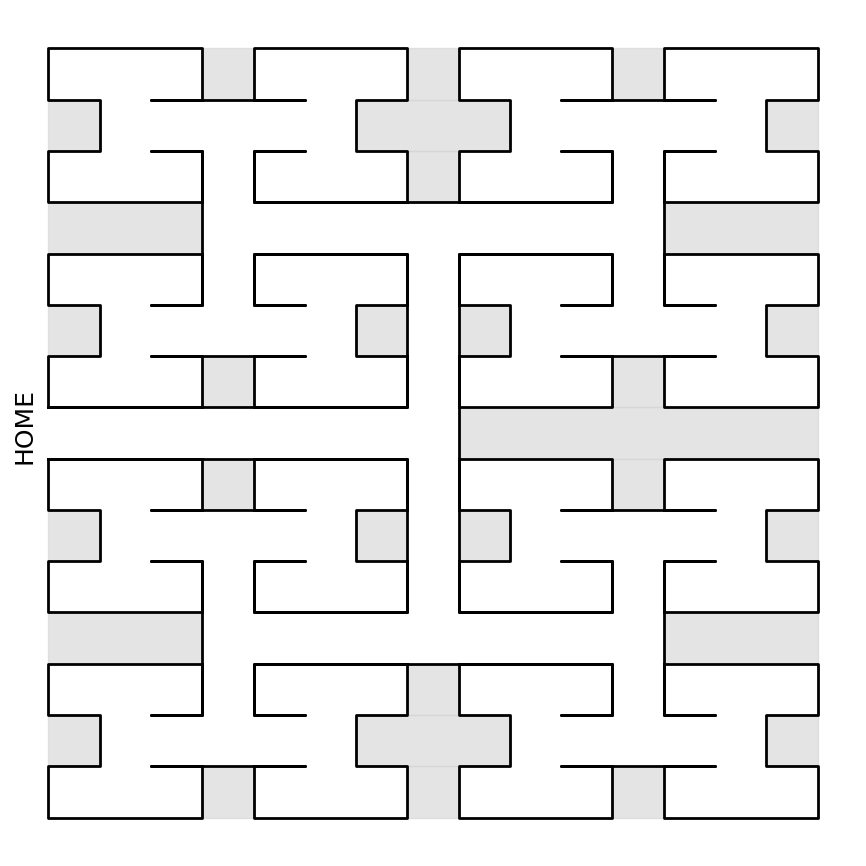

In [12]:
plt_trajectory([], 'all', save_file_name=f'{figpath}/empty_maze.pdf')

130


/var/folders/yx/80nc9b6n4pg69y4hhtmkpw100000gp/T/ipykernel_69760/2401505023.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


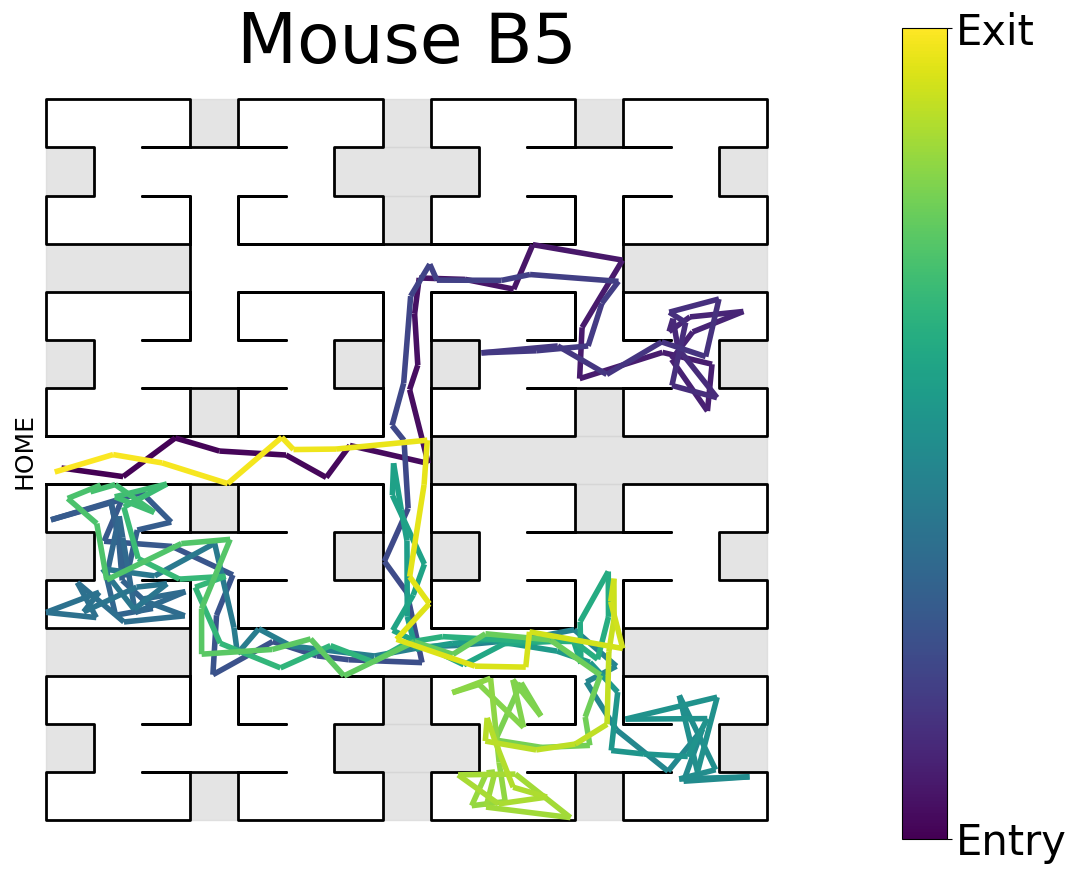

In [124]:
mouse='B5'
tf = LoadTrajFromPath(f'../outdata/{mouse}-tf')
i=81
traj = tf.no[i][:, 0]
print(len(traj))
plt_trajectory([traj], 'all', save_file_name=f'{figpath}/mouse{mouse}_{i}.pdf', title=f'Mouse {mouse}', entry_exit_colorbar=True)

186


/var/folders/yx/80nc9b6n4pg69y4hhtmkpw100000gp/T/ipykernel_69760/2401505023.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


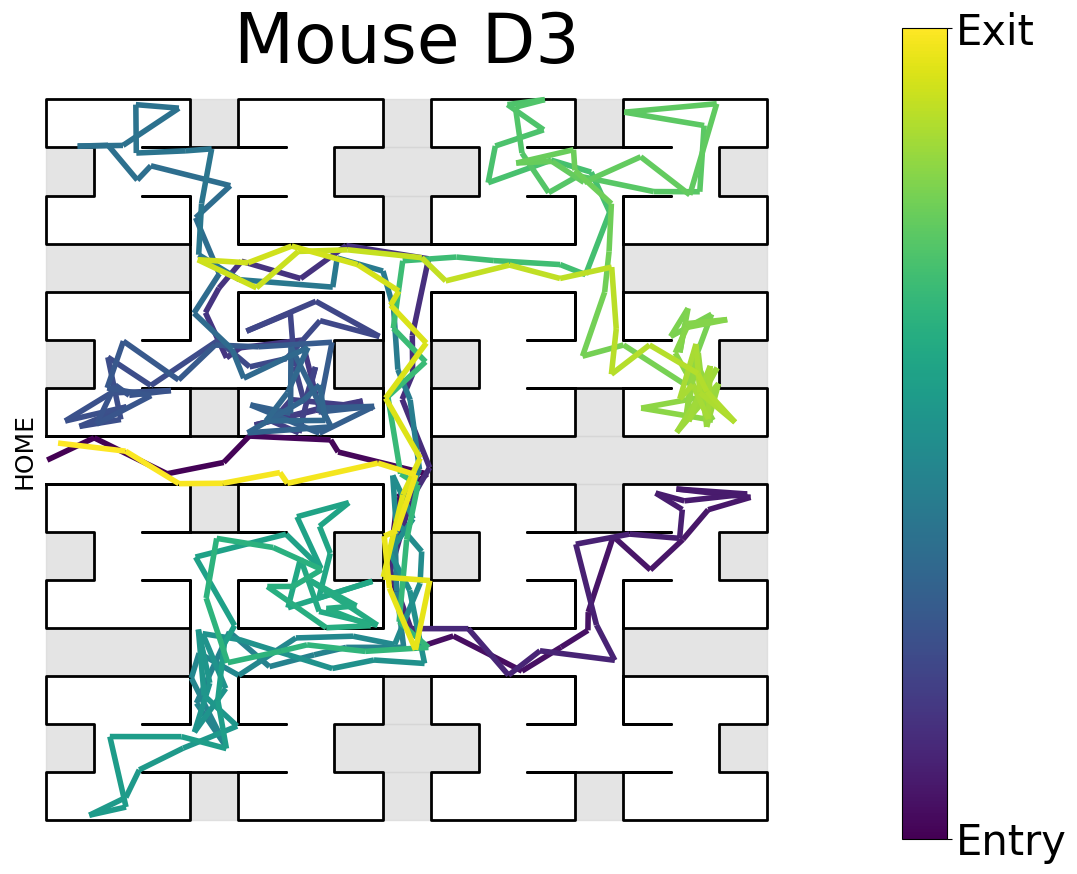

In [125]:
mouse = 'D3'
tf = LoadTrajFromPath(f'../outdata/{mouse}-tf')
i=226
traj = tf.no[i][:, 0]
print(len(traj))
plt_trajectory([traj], 'all', save_file_name=f'{figpath}/mouse{mouse}_{i}.pdf', title=f'Mouse {mouse}', entry_exit_colorbar=True)

200
176


/var/folders/yx/80nc9b6n4pg69y4hhtmkpw100000gp/T/ipykernel_2241/2401505023.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


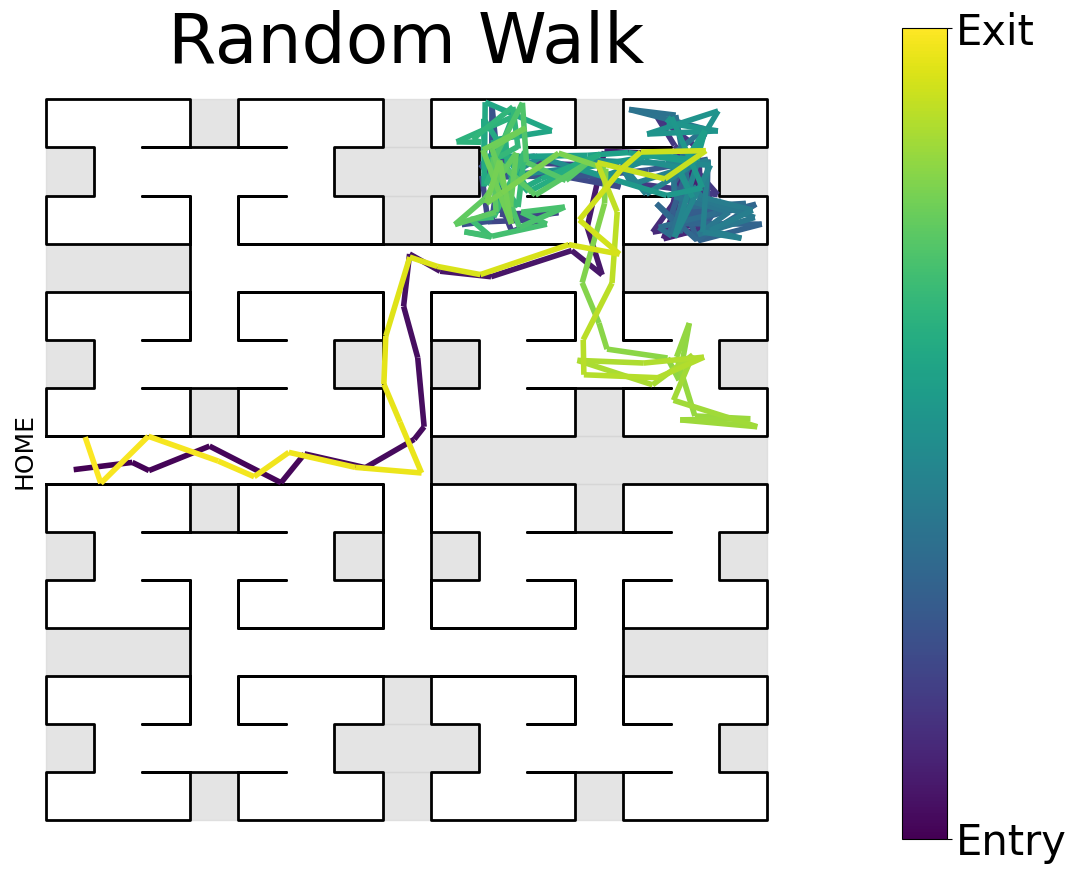

In [16]:
random_tf=LoadTrajFromPath('../outdata/rw01-tf')

lens = np.array([len(_) for _ in random_tf.no])
i = np.random.choice(np.where((lens < 180) & (lens > 150))[0])
i=200
print(i)
traj = random_tf.no[i][:, 0]
print(len(traj))
plt_trajectory([traj], 'all', display=False, title=f'Random Walk', 
               save_file_name=f'{figpath}/randomwalktraj.pdf', 
               entry_exit_colorbar=True)

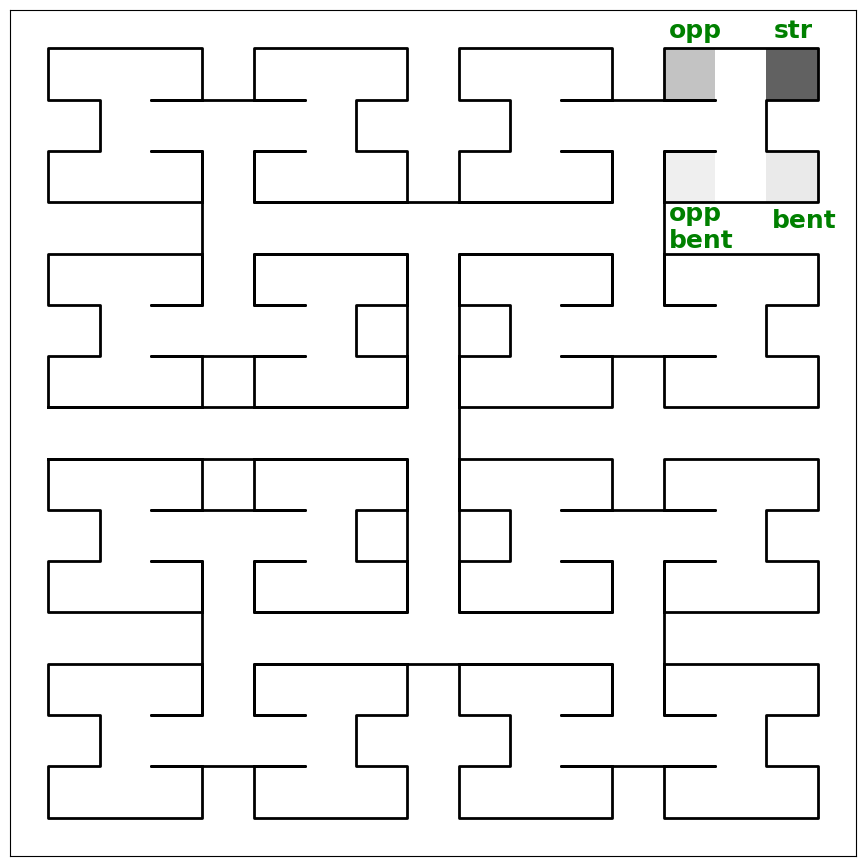

In [366]:
ma = NewMaze()

first_visit_label_counts = {
    'str': 61.8,
    'opp': 23.6,
    'bent': 8.4,
    'opp_bent': 6.2
}
first_visit_label_counts = {k:v/100 for k, v in first_visit_label_counts.items()}

first_visit_plot = np.zeros(127)
first_visit_plot[84] = first_visit_label_counts['str']    # s
first_visit_plot[83] = first_visit_label_counts['opp']  # o_s
first_visit_plot[86] = first_visit_label_counts['bent']   # bs
first_visit_plot[85] = first_visit_label_counts['opp_bent'] # o_bs
first_visit_plot = first_visit_plot

ax = PlotMazeFunction(first_visit_plot, ma, mode='nodes', numcol='', figsize=9)

# straight
x = ma.xc[133]
y = ma.yc[133]
plt.text(x-.35,y-0.7,'str',color='g', weight='bold')

# o_s
x = ma.xc[132]
y = ma.yc[132]
plt.text(x-0.4,y-0.7,'opp',color='g', weight='bold')

# bs
x = ma.xc[135]
y = ma.yc[135]
plt.text(x-0.4,y+1,'bent',color='g', weight='bold')

# o_bs
x = ma.xc[134]
y = ma.yc[134]
plt.text(x-.4,y+1.4,'opp\nbent',color='g', weight='bold')

plt.tight_layout()
plt.savefig(f'{figpath}/firstnode.png', dpi=300, bbox_inches='tight', transparent=True)
plt.savefig(f'{figpath}/firstnode.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [362]:
with open(p.OUTDATA_PATH + 'first_endnode_label_unrewarded.pkl', 'rb') as f:
    first_endnode_label_animal = pickle.load(f)

new_dict = {}
new_dict['str'] = first_endnode_label_animal['straight']
new_dict['opp'] = first_endnode_label_animal['opposite straight']
new_dict['bent'] = first_endnode_label_animal['bent straight']
new_dict['opp\nbent'] = first_endnode_label_animal['opposite bent straight']

0 [54.6  61.6  47.62 58.78 70.86 53.09 81.55 70.53 62.2 ] 62.314\% \pm 3.504\%
1 [14.11  4.   11.43  6.11  7.43  8.02  4.85  7.37 12.2 ] 8.391\% \pm 1.152\%
2 [28.22 28.   30.48 24.43 16.57 31.48 10.68 20.   17.07] 22.992\% \pm 2.414\%
3 [ 3.07  6.4  10.48 10.69  5.14  7.41  2.91  2.11  8.54] 6.306\% \pm 1.079\%


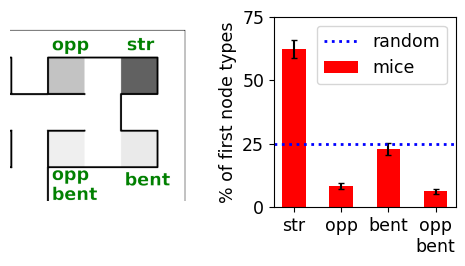

In [367]:
import matplotlib.image as mpimg
from scipy.stats import sem
fig, ax = plt.subplots(1, 2, figsize=(5, 3))

# Load the image
img = mpimg.imread(f'{figpath}/firstnode.png')
half_img = img[:img.shape[1] // 4+100, 3*img.shape[1] // 4-117:]
ax[0].imshow(half_img)
ax[0].axis('off')

for i, t in enumerate(new_dict):
    data = np.array(new_dict[t])
    print(i, data, f'{round(np.mean(data), 3)}\% \pm {round(sem(data), 3)}\%')
    ax[1].bar(i, np.mean(data), color='red', yerr=sem(data), 
              label='mice' if i == 0 else '', capsize=2, width=0.5)

ax[1].axhline(25, c='blue', ls=':', lw=2, label='random')
ax[1].legend(fontsize='x-small')
ax[1].set_ylabel('% of first node types', fontsize='x-small')
# ax[1].set_xlabel('Type of end node first hit', fontsize='x-small')
ax[1].set_yticks([0, 25, 50, 75])
ax[1].set_xticks(range(len(new_dict)), list(new_dict.keys()))
ax[1].tick_params(axis='x', labelsize='x-small')
ax[1].tick_params(axis='y', labelsize='x-small')
plt.tight_layout()
plt.savefig(f'{figpath}/firstnodebar.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [270]:
# import parameters as p
# from scipy.stats import sem


# with open(p.OUTDATA_PATH + 'first_endnode_label_unrewarded.pkl', 'rb') as f:
#     first_endnode_label_animal = pickle.load(f)

# new_dict = {}
# new_dict['str'] = first_endnode_label_animal['straight']
# new_dict['opp'] = first_endnode_label_animal['opposite straight']
# new_dict['bent'] = first_endnode_label_animal['bent straight']
# new_dict['opp bent'] = first_endnode_label_animal['opposite bent straight']

# for i, t in enumerate(new_dict):
#     data = np.array(new_dict[t])/100
#     plt.scatter(np.random.normal(loc=i, scale=0.05, size=len(data)), data, c='red', alpha=0.8)
#     plt.errorbar(i+0.2, np.mean(data), yerr=sem(data), fmt='o', color='k', capsize=2, label="mice" if i == 0 else '')

# plt.axhline(0.25, c='blue', ls=':', lw=2, label='random')

# plt.xticks(ticks=range(len(new_dict)), labels=list(new_dict.keys()), rotation=5)
# plt.ylabel('Frequency')
# plt.legend(loc='upper right')

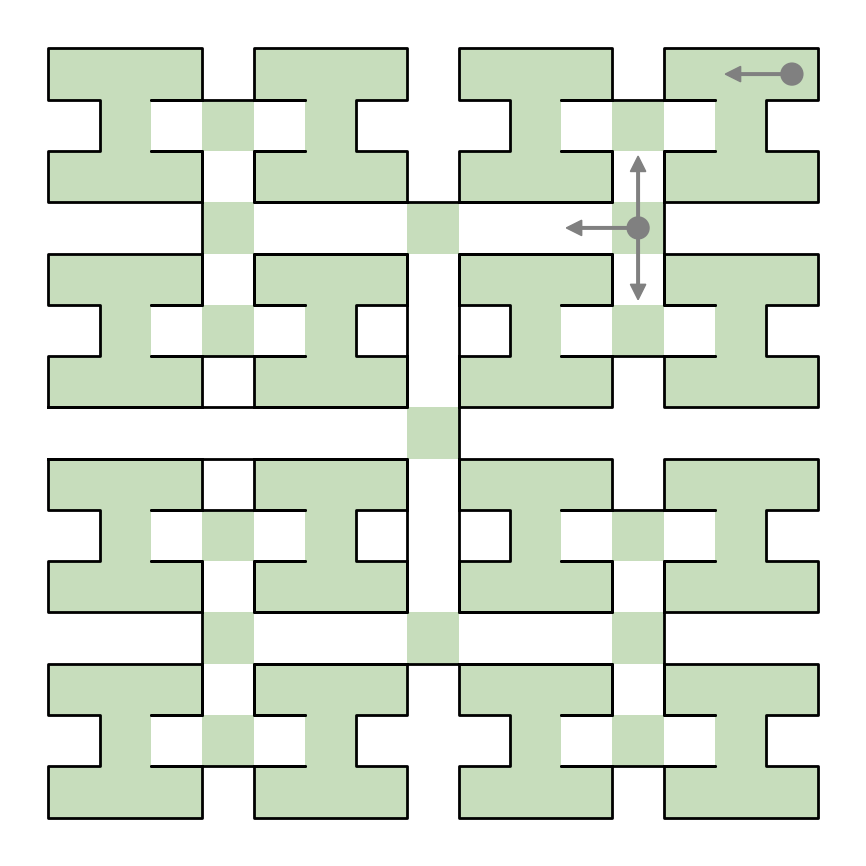

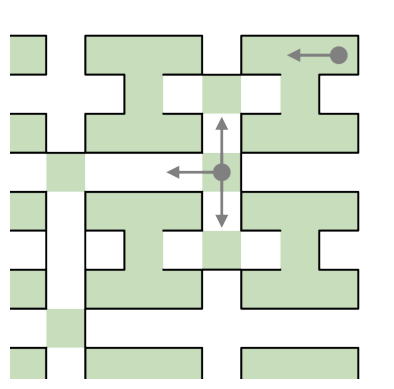

In [477]:
from matplotlib.patches import Circle

ax = PlotMazeFunction(np.ones(127)*0.1, ma, mode='nodes', 
                      col=np.array([[0.1, 199/255, 221/255, 188/255]]),
                      numcol='', figsize=9)

color = 'gray' # #92C679 204, 234, 190
width = 0.05
plt.arrow(11, 3.1, 0, 1, head_width=0.3, head_length=0.3, fc=color, ec=color, width=width)
plt.arrow(11, 2.9, 0, -1, head_width=0.3, head_length=0.3, fc=color, ec=color, width=width)
plt.arrow(10.9, 3, -1, 0, head_width=0.3, head_length=0.3, fc=color, ec=color, width=width)

plt.arrow(14, 0, -1, 0, head_width=0.3, head_length=0.3, fc=color, ec=color, width=width)

ax.add_patch(Circle((11, 3), 0.2, edgecolor=color, facecolor=color, linewidth=2))
ax.add_patch(Circle((14, 0), 0.2, edgecolor=color, facecolor=color, linewidth=2))

plt.axis('off')
plt.savefig(f'{figpath}/../figure_model/mdpsetup.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

plt.figure()
img = mpimg.imread(f'{figpath}/../figure_model/mdpsetup.png')
half_img = img[40:img.shape[1] // 2 +200, img.shape[1] // 2-220:-40]
plt.imshow(half_img)
plt.axis('off')
plt.savefig(f'{figpath}/../figure_model/mdpsetup_cropped.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

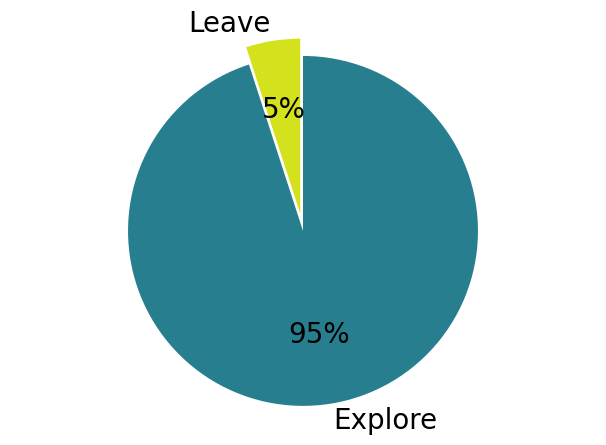

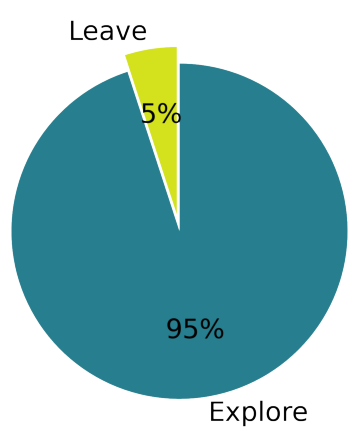

In [517]:
# Pie charts, where the slices will be ordered and plotted counter-clockwise:
labels = 'Leave','Explore'
sizes = [5, 95]
explode = (0,0.1)  # only "explode" the 2nd slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90,colors=['#D3E21C','#277e8e'], textprops={'fontsize': 20})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.savefig(f'{figpath}/UnrewPie.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


plt.figure()
img = mpimg.imread(f'{figpath}/UnrewPie.png')
half_img = img[:, 380:img.shape[1]-380]
plt.imshow(half_img)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'{figpath}/UnrewPie_cropped.pdf', dpi=300, bbox_inches='tight', transparent=True)

plt.show()